## 1) CREATE A SPARK SESSION

In [1]:
from pyspark.sql import SparkSession

# Creating a SparkSession
spark = SparkSession.builder.appName("Assignment_3").getOrCreate()

# Printing the Spark version
print("Spark version:", spark.version)

Spark version: 3.3.2


## 2) DEFINE THE SCHEMA FOR LOADING CHICAGO DATA SET

In [2]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, TimestampType, DoubleType

# Defining the schema for the Chicago crime dataset
schema = StructType([
    StructField("ID", IntegerType(), True),
    StructField("Case Number", StringType(), True),
    StructField("Date", StringType(), True),
    StructField("Block", StringType(), True),
    StructField("IUCR", StringType(), True),
    StructField("Primary Type", StringType(), True),
    StructField("Description", StringType(), True),
    StructField("Location Description", StringType(), True),
    StructField("Arrest", StringType(), True),
    StructField("Domestic", StringType(), True),
    StructField("Beat", IntegerType(), True),
    StructField("District", IntegerType(), True),
    StructField("Ward", IntegerType(), True),
    StructField("Community Area", IntegerType(), True),
    StructField("FBI Code", StringType(), True),
    StructField("X Coordinate", DoubleType(), True),
    StructField("Y Coordinate", DoubleType(), True),
    StructField("Year", IntegerType(), True),
    StructField("Updated On", StringType(), True),
    StructField("Latitude", DoubleType(), True),
    StructField("Longitude", DoubleType(), True),
    StructField("Location", StringType(), True)
])


## 3) LOADING CHICAGO CRIMES DATA SET

In [3]:
#Loading CSV file
df = spark.read.csv("Crimes_-_2001_to_Present.csv", header=True, schema=schema)

In [4]:
# PRINTING TOP 10 RECORDS
df.show(10)

+--------+-----------+--------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|                Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+--------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|09/05/2015 01:30:...|     043XX S WOOD ST|0486|           BATTERY|DOMESTIC BATTERY ...|           RESIDENCE|

In [5]:
#Printing Number of rows
df.count()

7760918

## 4) a) REMOVE NULL VALUES

In [6]:
df = df.dropna()

In [7]:
#CHECKING THE COUNT AFTER REMOVING NULL VALUES
df.count()

7061907

## 4) b) CHANGE THE DATA TYPE OF DATE COLUMN

In [8]:
from pyspark.sql.functions import to_timestamp

In [9]:
#Printing the Schema before changing data type of Date Column
df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: integer (nullable = true)
 |-- District: integer (nullable = true)
 |-- Ward: integer (nullable = true)
 |-- Community Area: integer (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: double (nullable = true)
 |-- Y Coordinate: double (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



In [10]:
#Changing the data type of date column from string to TimeStamp
df = df.withColumn("Date", to_timestamp(df["Date"], "MM/dd/yyyy hh:mm:ss a"))


In [11]:
# PRINTING THE SCHEMA TO CHECK THE DATA TYPE CHANGE
df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: integer (nullable = true)
 |-- District: integer (nullable = true)
 |-- Ward: integer (nullable = true)
 |-- Community Area: integer (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: double (nullable = true)
 |-- Y Coordinate: double (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



## 5) Filter the data for last ten years.

In [12]:
from pyspark.sql.functions import current_date, date_sub,when,col,year,count,hour,desc

In [13]:
# Calculating the date 10 years ago from today
ten_years_ago = date_sub(current_date(), 365 * 10)

In [14]:
#Filter the DataFrame for dates within the last ten years
df1 = df.filter(df.Date >= ten_years_ago)

In [15]:
#PRINTING THE VALUE COUNTS OF DATE COLUMN TO VERIFY THE FILTER
df1.groupBy("Date").count().show()

+-------------------+-----+
|               Date|count|
+-------------------+-----+
|2015-09-05 18:05:00|    1|
|2015-09-07 19:20:00|    1|
|2016-04-20 20:10:29|    1|
|2016-11-17 22:21:29|    1|
|2016-11-26 19:48:23|    1|
|2015-09-07 22:53:00|    1|
|2015-09-09 16:48:00|    2|
|2015-09-11 16:27:00|    1|
|2015-09-11 23:36:00|    1|
|2015-03-30 09:00:00|   21|
|2015-09-12 16:13:00|    1|
|2015-09-12 17:35:00|    1|
|2015-09-12 18:44:00|    1|
|2015-09-13 21:22:00|    1|
|2015-09-11 15:20:00|    1|
|2015-09-15 13:20:00|    1|
|2015-09-15 19:35:00|    1|
|2015-04-24 13:46:00|    1|
|2015-04-01 00:01:00|   20|
|2015-09-16 18:02:00|    1|
+-------------------+-----+
only showing top 20 rows



In [16]:
#CHECKING NUMBER OF ROWS IN NEW DATA FRAME
df1.count()

2511584

## 6) Remove all the records with the following crime types:
##### 'NON-CRIMINAL (SUBJECT SPECIFIED)'
##### 'OTHER OFFENSE'
#####  'STALKING'
#####  'NON - CRIMINAL'
#####  'ARSON'

In [17]:
crime_types_to_remove = ['NON-CRIMINAL (SUBJECT SPECIFIED)', 'OTHER OFFENSE', 'STALKING', 'NON - CRIMINAL', 'ARSON']

# filter out the records with the specified crime types
df1 = df1.filter(~df1["Primary Type"].isin(crime_types_to_remove))

# show the first 10 rows of the filtered DataFrame
df1.show(10)


+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true| 924|       

In [18]:
#SHOWING THE VALUE COUNTS OF PRIMARY COUNT COLUMN
df1.groupBy("Primary Type").count().show()

+--------------------+------+
|        Primary Type| count|
+--------------------+------+
|OFFENSE INVOLVING...| 20882|
|CRIMINAL SEXUAL A...|  5442|
|PUBLIC PEACE VIOL...| 16473|
|           OBSCENITY|   517|
|            GAMBLING|  2046|
|   CRIMINAL TRESPASS| 59529|
|             ASSAULT|190186|
|LIQUOR LAW VIOLATION|  2495|
| MOTOR VEHICLE THEFT|118168|
|               THEFT|567678|
|             BATTERY|469986|
|             ROBBERY| 96778|
|            HOMICIDE|  6294|
|    PUBLIC INDECENCY|    98|
| CRIM SEXUAL ASSAULT|  8552|
|   HUMAN TRAFFICKING|    88|
|        INTIMIDATION|  1473|
|        PROSTITUTION|  7785|
|  DECEPTIVE PRACTICE|155593|
|CONCEALED CARRY L...|  1056|
+--------------------+------+
only showing top 20 rows



## 7) Merge the similar crime types

In [19]:
#Merging similar crime Types
df1 = df1.withColumn("Primary Type", \
                        when(col("Primary Type") == "SEX OFFENSE", "SEX CRIMES") \
                        .when(col("Primary Type") == "PROSTITUTION", "SEX CRIMES") \
                        .when(col("Primary Type") == "MOTOR VEHICLE THEFT", "THEFT") \
                        .when(col("Primary Type") == "THEFT", "THEFT")                                          
                        .otherwise(col("Primary Type")))

In [20]:
#SHOWING THE VALUE COUNTS OF PRIMARY COUNT COLUMN
df1.groupBy("Primary Type").count().show()

+--------------------+------+
|        Primary Type| count|
+--------------------+------+
|OFFENSE INVOLVING...| 20882|
|CRIMINAL SEXUAL A...|  5442|
|PUBLIC PEACE VIOL...| 16473|
|           OBSCENITY|   517|
|            GAMBLING|  2046|
|          SEX CRIMES| 17868|
|   CRIMINAL TRESPASS| 59529|
|             ASSAULT|190186|
|LIQUOR LAW VIOLATION|  2495|
|               THEFT|685846|
|             BATTERY|469986|
|             ROBBERY| 96778|
|            HOMICIDE|  6294|
|    PUBLIC INDECENCY|    98|
| CRIM SEXUAL ASSAULT|  8552|
|   HUMAN TRAFFICKING|    88|
|        INTIMIDATION|  1473|
|  DECEPTIVE PRACTICE|155593|
|CONCEALED CARRY L...|  1056|
|     CRIMINAL DAMAGE|276813|
+--------------------+------+
only showing top 20 rows



In [21]:
import matplotlib.pyplot as plt

## 8) a) Show year-wise trend of the crime for last ten years.

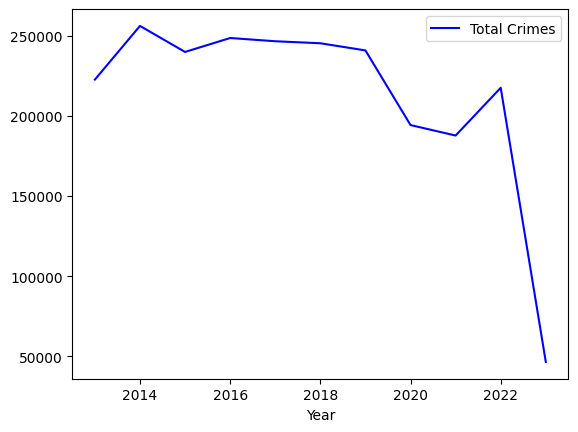

In [22]:
crime_data_year = df1.withColumn("Year", year("Date"))

# showing year-wise trend of crime for the last ten years using line graph
crime_data_year.filter(col("Year") >= 2011) \
    .groupBy("Year").agg(count("*").alias("Total Crimes"))\
    .sort("Year") \
    .toPandas() \
    .plot(kind='line', x='Year', y='Total Crimes', color='blue')
plt.show()

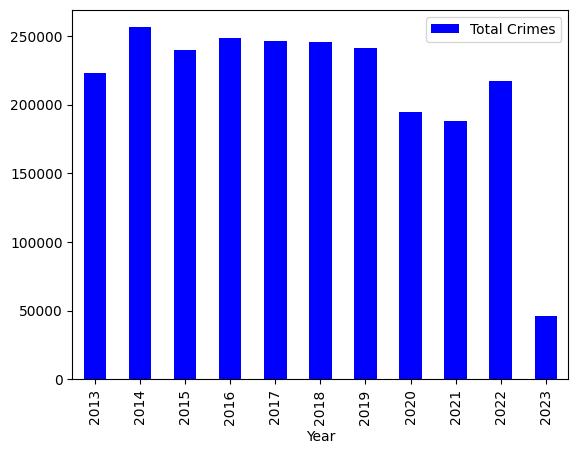

In [23]:
# showing year-wise trend of crime for the last ten years using bar graph
crime_data_year.filter(col("Year") >= 2011) \
    .groupBy("Year").agg(count("*").alias("Total Crimes"))\
    .sort("Year") \
    .toPandas() \
    .plot(kind='bar', x='Year', y='Total Crimes', color='blue')
plt.show()

## 8) b) Find out at which hour of the day crime is highest.

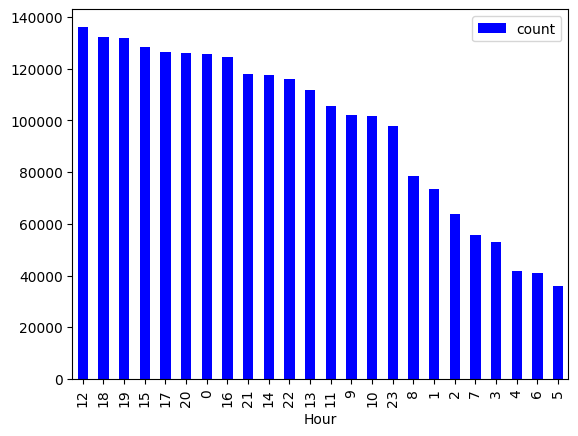

In [24]:
crime_data_hour = df1.withColumn("Hour", hour("Date"))
crime_data_hour.groupBy("Hour").count().sort(desc("count")).toPandas() \
.plot(kind='bar',x='Hour',y='count',color='blue')
plt.show()

12th hour of a day has highest number of crimes 

## 8) c)  Find top ten crimes and present them as a bar chart 

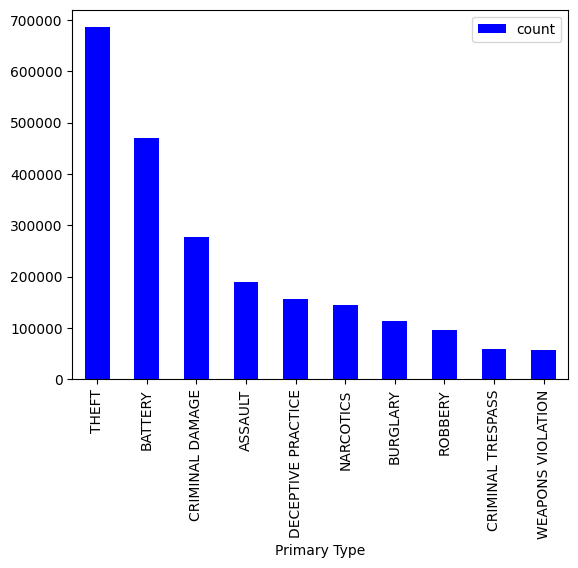

In [25]:
df1.groupBy("Primary Type").count() \
    .sort(desc("count")).limit(10).toPandas() \
    .plot(kind='bar', x='Primary Type', y='count', color='blue')
plt.show()
